<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_LimpiezaTexto_snscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de texto con tweets

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np
import re
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import date

@username se puede usar en la cadena de búsqueda para buscar aquellos tweets que mencionan ese usuario.

Esto, unido con -from:username puede dar los tweets que lo mencionan, quitando los que ellos mismos mencionan, en idioma español.

Por ejemplo, para buscar los tweets que hablan de CanalRCN, pero no las noticias que ellos mismos ponen, podemos hacer una búsqueda así:

In [3]:
username='CanalRCN'
from_date = '2022-06-01'
end_date=date.today()
search='@"{}" -from:"{}" lang:es since:"{}" until:"{}"'.format(username,username,from_date,end_date)

In [4]:
df_RCN = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(search).get_items(), 5000))

In [5]:
len(df_RCN)

5000

In [6]:
df_RCN

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 23:51:00+00:00,Costa Rica – Australia\nTV: @CanalRCN HD2 \nNa...,1557514883935088640,TorresTavo,[],,[],
1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 23:50:53+00:00,@gener_usuga @tome_conciencia @CanalRCN @Carac...,1557514856328269824,Adriana63363114,[],,[],
2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 23:49:36+00:00,"JUANITA: Si usted trabajara en el @CanalRCN , ...",1557514531114557440,AlfonsoPinedaCh,[https://twitter.com/anatolykarpovv/status/155...,https://twitter.com/anatolykarpovv/status/1557...,[https://t.co/OJhqDsBNvh],https://t.co/OJhqDsBNvh
3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 23:46:01+00:00,@Bancolombia alguien está mandando mensajes di...,1557513632136790026,jpcaballero04,[],,[],
4,https://twitter.com/william91676615/status/155...,2022-08-10 23:41:00+00:00,@gener_usuga @carlosromerojai @CanalRCN @Carac...,1557512368841793536,william91676615,[],,[],
...,...,...,...,...,...,...,...,...,...
4995,https://twitter.com/unmelomano11/status/155498...,2022-08-04 00:37:55+00:00,@manzanillaente @Margaritarosadf @CanalRCN Jaj...,1554989977385189377,unmelomano11,[],,[],
4996,https://twitter.com/ConchadeFranco/status/1554...,2022-08-04 00:37:53+00:00,@Margaritarosadf @CanalRCN Que pereza!!!,1554989967998439424,ConchadeFranco,[],,[],
4997,https://twitter.com/Concien23182061/status/155...,2022-08-04 00:37:51+00:00,@Margaritarosadf @CanalRCN Que hueso!!!!.... S...,1554989960998051843,Concien23182061,[],,[],
4998,https://twitter.com/sagitta1128/status/1554989...,2022-08-04 00:37:39+00:00,@Margaritarosadf @CanalRCN En serio???? Super!...,1554989909991211008,sagitta1128,[],,[],


In [7]:
df_RCN.date = df_RCN.date.dt.tz_convert('America/Bogota')

In [8]:
df_RCN.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,Costa Rica – Australia\nTV: @CanalRCN HD2 \nNa...,1557514883935088640,TorresTavo,[],,[],
1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,@gener_usuga @tome_conciencia @CanalRCN @Carac...,1557514856328269824,Adriana63363114,[],,[],
2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,"JUANITA: Si usted trabajara en el @CanalRCN , ...",1557514531114557440,AlfonsoPinedaCh,[https://twitter.com/anatolykarpovv/status/155...,https://twitter.com/anatolykarpovv/status/1557...,[https://t.co/OJhqDsBNvh],https://t.co/OJhqDsBNvh
3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,@Bancolombia alguien está mandando mensajes di...,1557513632136790026,jpcaballero04,[],,[],
4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,@gener_usuga @carlosromerojai @CanalRCN @Carac...,1557512368841793536,william91676615,[],,[],


In [9]:
min(df_RCN.date)

Timestamp('2022-08-03 19:37:36-0500', tz='America/Bogota')

## Guardar los datos en un CSV

In [10]:
path='/content/drive/MyDrive/Datasets/'

In [12]:
df_RCN.to_csv(path+'SearchRCNTV_.csv', encoding='utf-8-sig')

## Cargar los datos de un CSV

In [14]:
df=pd.read_csv(path+'SearchRCNTV_.csv', encoding='utf-8-sig')

In [15]:
df.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,Costa Rica – Australia\nTV: @CanalRCN HD2 \nNa...,1557514883935088640,TorresTavo,[],NaN,[],NaN
1,1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,@gener_usuga @tome_conciencia @CanalRCN @Carac...,1557514856328269824,Adriana63363114,[],NaN,[],NaN
2,2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,"JUANITA: Si usted trabajara en el @CanalRCN , ...",1557514531114557440,AlfonsoPinedaCh,['https://twitter.com/anatolykarpovv/status/15...,https://twitter.com/anatolykarpovv/status/1557...,['https://t.co/OJhqDsBNvh'],https://t.co/OJhqDsBNvh
3,3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,@Bancolombia alguien está mandando mensajes di...,1557513632136790026,jpcaballero04,[],NaN,[],NaN
4,4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,@gener_usuga @carlosromerojai @CanalRCN @Carac...,1557512368841793536,william91676615,[],NaN,[],NaN


## WordCloud

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
text = ' '.join(txt for txt in df.content)
len(text)

614598

(-0.5, 399.5, 199.5, -0.5)

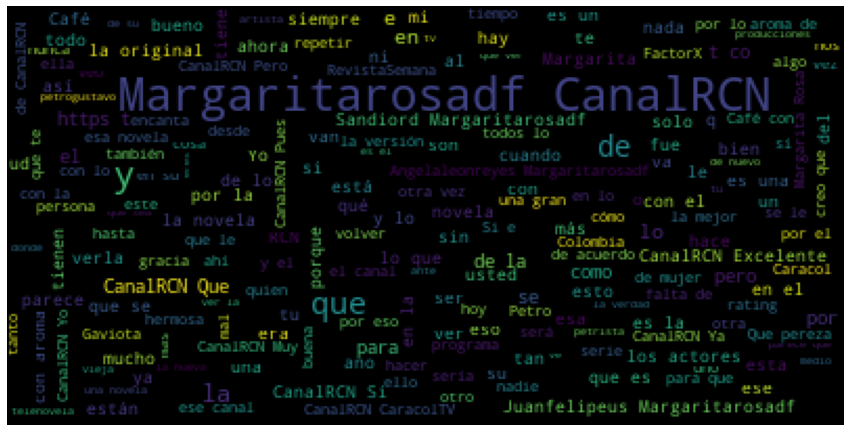

In [18]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

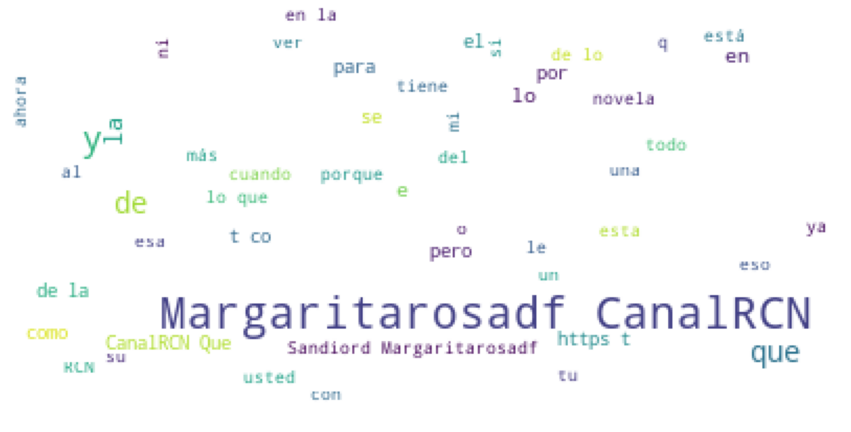

In [19]:
wordcloud = (WordCloud(background_color="white", 
                      max_words=50) 
                      .generate(text))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

In [20]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
Margaritarosadf CanalRCN,1.000000
y,0.504305
que,0.360792
de,0.335821
la,0.262055
e,0.164753
lo,0.152985
en,0.146096
por,0.118255
de la,0.114811


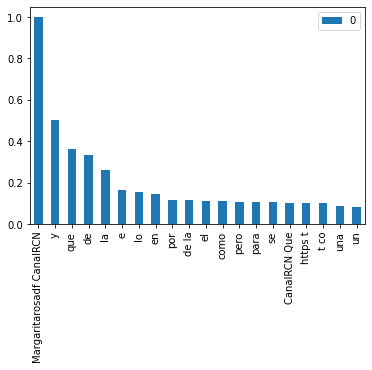

In [21]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

Podemos dividir los textos en palabras y contarlos.

Podemos llevar a minúsculas primero y luego hacer una separación de todo los textos juntos en palabras.

In [22]:
words_in_tweet =text.lower().split()

In [23]:
counts_words = collections.Counter(words_in_tweet)
words_top=counts_words.most_common(10)
words, freqs = zip(*counts_words.most_common()[:10])
for w,q in zip(words, freqs):
  print(w,'\t',q)

@canalrcn 	 5012
@margaritarosadf 	 3595
de 	 3091
que 	 3082
la 	 2928
y 	 2109
a 	 1871
no 	 1674
el 	 1299
en 	 1204


In [24]:
counts_words.most_common()

[('@canalrcn', 5012),
 ('@margaritarosadf', 3595),
 ('de', 3091),
 ('que', 3082),
 ('la', 2928),
 ('y', 2109),
 ('a', 1871),
 ('no', 1674),
 ('el', 1299),
 ('en', 1204),
 ('es', 1135),
 ('por', 1029),
 ('los', 942),
 ('lo', 820),
 ('con', 809),
 ('se', 775),
 ('una', 647),
 ('me', 634),
 ('las', 538),
 ('un', 514),
 ('para', 512),
 ('pero', 439),
 ('si', 426),
 ('como', 417),
 ('ya', 402),
 ('ver', 388),
 ('su', 374),
 ('le', 365),
 ('del', 358),
 ('más', 318),
 ('esa', 305),
 ('muy', 284),
 ('novela', 276),
 ('q', 266),
 ('o', 258),
 ('te', 256),
 ('ese', 256),
 ('al', 256),
 ('usted', 233),
 ('@sandiord', 230),
 ('canal', 226),
 ('eso', 221),
 ('mejor', 220),
 ('rcn', 209),
 ('les', 201),
 ('ni', 200),
 ('mi', 199),
 ('tiene', 175),
 ('parece', 174),
 ('ahora', 173),
 ('porque', 168),
 ('ser', 165),
 ('fue', 164),
 ('yo', 164),
 ('esta', 163),
 ('hace', 158),
 ('está', 157),
 ('solo', 156),
 ('hay', 155),
 ('son', 155),
 ('cuando', 154),
 (',', 153),
 ('todo', 149),
 ('nada', 149),
 

<BarContainer object of 10 artists>

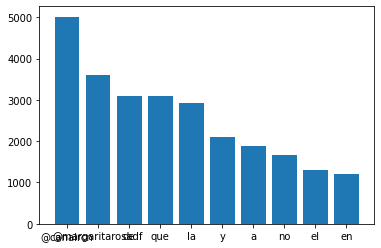

In [25]:
plt.bar(list(words), list(freqs))

In [26]:
import plotly.express as px
fig = px.bar(x=list(words), y=list(freqs))
fig.show()

## Uso de expresiones regulares

Con una expresión regular podemos buscar las menciones de usuarios que en Twitter comienzan con @.

Si tenemos los datos en un dataframe este tiene algunas funciones para, a partir de una expresión regular, buscar patrones, sustituir textos.

str.contains(exp_regular): Devuelve verdero si encuentra el patrón en el texto

str.findall(exp_regular): Devuelve la lista de los patrones encontrados.

In [ ]:
df.content.str.contains(r'@\w+') #El tweet menciona a algun usuario

0       True
1       True
2       True
3       True
4       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Name: content, Length: 5000, dtype: bool

In [27]:
screen_names_list=df.content.str.findall(r"@\w+").sum()# Aplanar la lista

In [28]:
screen_names_list

['@CanalRCN',
 '@pazosnarrador',
 '@Pauladaza92',
 '@valentinapena98',
 '@gener_usuga',
 '@tome_conciencia',
 '@CanalRCN',
 '@CaracolTV',
 '@CanalRCN',
 '@Bancolombia',
 '@CaracolRadio',
 '@NoticiasCaracol',
 '@CanalRCN',
 '@BluRadioCo',
 '@gener_usuga',
 '@carlosromerojai',
 '@CanalRCN',
 '@CaracolTV',
 '@gener_usuga',
 '@edgarguasca',
 '@CanalRCN',
 '@CaracolTV',
 '@LaNocheNTN24',
 '@CanalRCN',
 '@JohnMarulandaM',
 '@acorecolombia',
 '@CGurisattiNTN24',
 '@JeffersonNTN24',
 '@NoticiasRCN',
 '@Jokeraton',
 '@CanalRCN',
 '@gener_usuga',
 '@CanalRCN',
 '@CaracolTV',
 '@DW',
 '@gener_usuga',
 '@CanalRCN',
 '@CaracolTV',
 '@CanalRCN',
 '@JohnMarulandaM',
 '@acorecolombia',
 '@CGurisattiNTN24',
 '@JeffersonNTN24',
 '@NoticiasRCN',
 '@CanalRCN',
 '@CGurisattiNTN24',
 '@JeffersonNTN24',
 '@gener_usuga',
 '@CanalRCN',
 '@CaracolTV',
 '@FranciaMarquezM',
 '@IvanDuque',
 '@s',
 '@CanalRCN',
 '@CaracolTV',
 '@lasillaenvivo',
 '@TelepacificoTV',
 '@nytimes',
 '@DemocracyNowEs',
 '@BluRadioCo',
 '

In [29]:
df.content[1]

'@gener_usuga @tome_conciencia @CanalRCN @CaracolTV Sería genial, porque canales malucos , inaportantes y sin contenido y esos dos petardos de la t.v colombiana !  Deberían sacarlos .'

In [30]:
re.findall('@\w+', df.content[1])

['@gener_usuga', '@tome_conciencia', '@CanalRCN', '@CaracolTV']

In [31]:
df['mentions'] = df['content'].apply(lambda x: re.findall('@\w+', x))

In [32]:
df['hashtag'] = df['content'].apply(lambda x: re.findall('#\w+', x))

In [33]:
df

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,Costa Rica – Australia\nTV: @CanalRCN HD2 \nNa...,1557514883935088640,TorresTavo,[],NaN,[],NaN,"[@CanalRCN, @pazosnarrador, @Pauladaza92, @val...","[#MundialSub20xRCN, #FIFAU20WWC]"
1,1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,@gener_usuga @tome_conciencia @CanalRCN @Carac...,1557514856328269824,Adriana63363114,[],NaN,[],NaN,"[@gener_usuga, @tome_conciencia, @CanalRCN, @C...",[]
2,2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,"JUANITA: Si usted trabajara en el @CanalRCN , ...",1557514531114557440,AlfonsoPinedaCh,['https://twitter.com/anatolykarpovv/status/15...,https://twitter.com/anatolykarpovv/status/1557...,['https://t.co/OJhqDsBNvh'],https://t.co/OJhqDsBNvh,[@CanalRCN],[]
3,3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,@Bancolombia alguien está mandando mensajes di...,1557513632136790026,jpcaballero04,[],NaN,[],NaN,"[@Bancolombia, @CaracolRadio, @NoticiasCaracol...",[]
4,4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,@gener_usuga @carlosromerojai @CanalRCN @Carac...,1557512368841793536,william91676615,[],NaN,[],NaN,"[@gener_usuga, @carlosromerojai, @CanalRCN, @C...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,https://twitter.com/unmelomano11/status/155498...,2022-08-03 19:37:55-05:00,@manzanillaente @Margaritarosadf @CanalRCN Jaj...,1554989977385189377,unmelomano11,[],NaN,[],NaN,"[@manzanillaente, @Margaritarosadf, @CanalRCN]",[]
4996,4996,https://twitter.com/ConchadeFranco/status/1554...,2022-08-03 19:37:53-05:00,@Margaritarosadf @CanalRCN Que pereza!!!,1554989967998439424,ConchadeFranco,[],NaN,[],NaN,"[@Margaritarosadf, @CanalRCN]",[]
4997,4997,https://twitter.com/Concien23182061/status/155...,2022-08-03 19:37:51-05:00,@Margaritarosadf @CanalRCN Que hueso!!!!.... S...,1554989960998051843,Concien23182061,[],NaN,[],NaN,"[@Margaritarosadf, @CanalRCN]",[]
4998,4998,https://twitter.com/sagitta1128/status/1554989...,2022-08-03 19:37:39-05:00,@Margaritarosadf @CanalRCN En serio???? Super!...,1554989909991211008,sagitta1128,[],NaN,[],NaN,"[@Margaritarosadf, @CanalRCN]",[]


In [34]:
screen_names = set(df.mentions.sum())
screen_names

{'@0275melany',
 '@0622Poli',
 '@117____Vanee_17',
 '@19Smarfel',
 '@888Prada',
 '@9a83298d8acf419',
 '@ADOLFOPEREZL',
 '@ANIABELLO_R',
 '@ANI_Colombia',
 '@ANNALVAREZG',
 '@ANYARATO',
 '@AYLEENCAROMACIA',
 '@AbrilSchreiber',
 '@AdriSarsynski',
 '@Adriana88492121',
 '@AdrianaLopez941',
 '@Aemon3428',
 '@AfiniaGrupoEPM',
 '@AgenciaDefensaJ',
 '@AlcaldiaLorica',
 '@AlcaldiadeMed',
 '@Aldeana67944701',
 '@AldumarForeroO',
 '@AlejandroRutto',
 '@Alfarero3O',
 '@AlfonsojRoserop',
 '@Alfred96038545',
 '@AlfredodelaA',
 '@Allison84047787',
 '@Almagro_OEA2015',
 '@AltamarElena',
 '@AlvaroUribeVel',
 '@AlvaroV62502520',
 '@AlverniaAbraham',
 '@AmadorMarquez5',
 '@Amapola3128991',
 '@AnaC_L28',
 '@AnaceCultura',
 '@Analist56181232',
 '@Anastasiaelizb_',
 '@Anavitrola',
 '@AndreaCMendoza',
 '@AndreaGuerreroQ',
 '@Andres76157211',
 '@AndresSubirath',
 '@Angar007',
 '@AngelaLozano15',
 '@AngelaRomeroCh',
 '@Angelaleonreyes',
 '@AngelicaLozanoC',
 '@AngeliqeFC',
 '@Angi_molina',
 '@AntonioCR1974',
 

In [ ]:
tweets_names = pd.DataFrame()
for name in screen_names:
  tweets_names[name.replace('@', '')] = df.content.str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
tweets_names

,soydssc,todoscolombia,robertopomboh,unrolomas,sosmovpolitico,wotalorag,DesafioCaracol,EnriquePenalosa,MelisaMarArtuz,hbomax,...,AlejandroChar,FamilyGSotoArg,NEIL19_1DEAD,RAMIROMENESES,jinelo,luisbascaran,letya6010,anthony_fabi,IsraelinSpanish,WarnerMedia
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
words, freqs=np.unique(np.array(screen_names_list),return_counts=True)

In [ ]:
fig = px.bar(x=words, y=freqs)
fig.show()

In [ ]:
name_counts = tweets_names.sum(axis=0).sort_values(ascending=False)

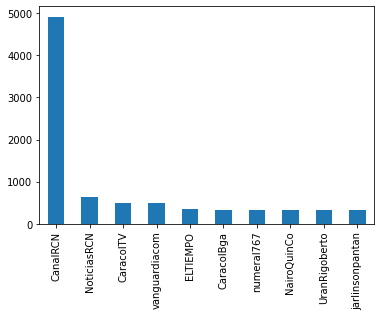

In [ ]:
name_counts[0:10].plot.bar()

## Uso de expresiones regulares para limpiar texto
Los textos siempre tienen ruido que nos impiden hacer un buen análisis del mismo. Por eso, lo primero que normalmente hacemos es una limpieza del texto eliminando de él todo aquello que no influye en entender de qué trata.

1.   Eliminamos las URL
2.   Eliminamos correos electrónicos
2.   Eliminamos hashtags
2.   Eliminamos menciones que se suelen hacer con @Nombre
2.   Eliminamos los números

patternURLEMAIL=r'
((\w+\.)*\w+@(\w+\.)+\w+)
|
(
  (http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*
  )'

In [36]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [35]:
from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’'])
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

In [37]:
df=pd.read_csv(path+'SearchRCNTV_.csv', encoding='utf-8-sig')

In [ ]:
df.head()

In [38]:
df_clean = clean_text(df.copy(), 'content')
df_clean.head(6)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,costa rica – australia tv hd narra comentan y,1557514883935088640,TorresTavo,[],NaN,[],NaN
1,1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,sería genial porque canales malucos inaporta...,1557514856328269824,Adriana63363114,[],NaN,[],NaN
2,2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,juanita si usted trabajara en el diría los mi...,1557514531114557440,AlfonsoPinedaCh,['https://twitter.com/anatolykarpovv/status/15...,https://twitter.com/anatolykarpovv/status/1557...,['https://t.co/OJhqDsBNvh'],https://t.co/OJhqDsBNvh
3,3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,alguien está mandando mensajes diciendo que l...,1557513632136790026,jpcaballero04,[],NaN,[],NaN
4,4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,necesitamos canales públicos es hora que lleg...,1557512368841793536,william91676615,[],NaN,[],NaN
5,5,https://twitter.com/elviejoed/status/155751003...,2022-08-10 18:31:45-05:00,según su lógica solo los productos estatales ...,1557510038851358720,elviejoed,[],NaN,[],NaN


## StopWords

La biblioteca Natural Language Toolkit (NLTK) tiene funciones para eliminar stopwords en diferentes idiomas.

In [39]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [41]:
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,costa rica – australia tv hd narra comentan,1557514883935088640,TorresTavo,[],NaN,[],NaN
1,1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,genial canales malucos inaportantes contenido ...,1557514856328269824,Adriana63363114,[],NaN,[],NaN
2,2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,juanita si usted trabajara diría mismo,1557514531114557440,AlfonsoPinedaCh,['https://twitter.com/anatolykarpovv/status/15...,https://twitter.com/anatolykarpovv/status/1557...,['https://t.co/OJhqDsBNvh'],https://t.co/OJhqDsBNvh
3,3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,alguien mandando mensajes diciendo clave princ...,1557513632136790026,jpcaballero04,[],NaN,[],NaN
4,4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,necesitamos canales públicos hora llegue noticias,1557512368841793536,william91676615,[],NaN,[],NaN


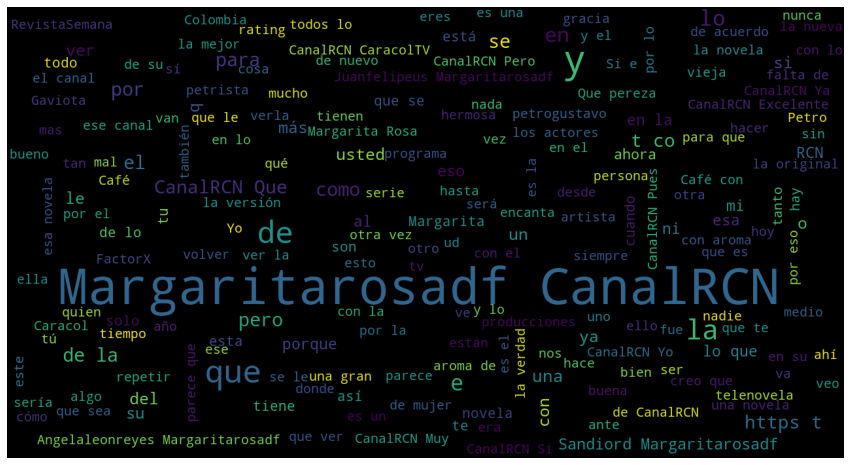

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(txt for txt in df.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

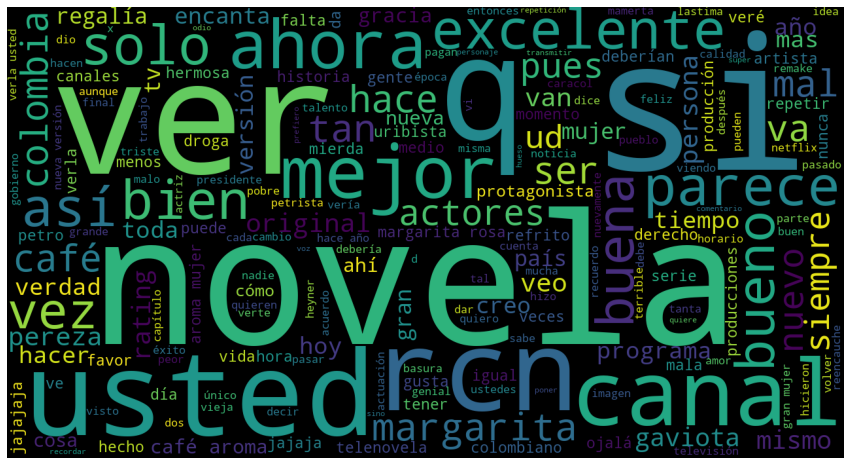

In [43]:
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

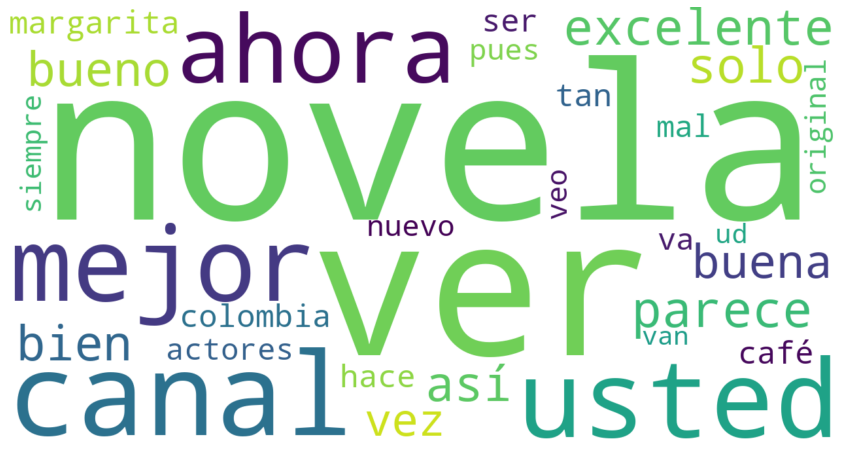

In [45]:
stop.extend(['rcn','si', 'q'])
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(background_color="white", max_words=30, contour_width=5, contour_color='steelblue', width=1280, height=690)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Eliminar emojis

In [46]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 28.3 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=3371a39d668fa5ecaf4c32e585fe742d9cdd855af959e0e6e1c3a437dc2ac26f
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [47]:
import emoji

In [54]:
emoji.get_emoji_unicode_dict('es')

{':medalla_de_oro:': '🥇',
 ':medalla_de_plata:': '🥈',
 ':medalla_de_bronce:': '🥉',
 ':grupo_sanguíneo_ab:': '🆎',
 ':señal_de_cajero_automático:': '🏧',
 ':grupo_sanguíneo_a:': '🅰️',
 ':bandera_afganistán:': '🇦🇫',
 ':bandera_albania:': '🇦🇱',
 ':bandera_argelia:': '🇩🇿',
 ':bandera_samoa_americana:': '🇦🇸',
 ':bandera_andorra:': '🇦🇩',
 ':bandera_angola:': '🇦🇴',
 ':bandera_anguila:': '🇦🇮',
 ':bandera_antártida:': '🇦🇶',
 ':bandera_antigua_y_barbuda:': '🇦🇬',
 ':acuario:': '♒',
 ':bandera_argentina:': '🇦🇷',
 ':aries:': '♈',
 ':bandera_armenia:': '🇦🇲',
 ':bandera_aruba:': '🇦🇼',
 ':bandera_isla_de_la_ascensión:': '🇦🇨',
 ':bandera_australia:': '🇦🇺',
 ':bandera_austria:': '🇦🇹',
 ':bandera_azerbaiyán:': '🇦🇿',
 ':flecha_back:': '🔙',
 ':grupo_sanguíneo_b:': '🅱️',
 ':bandera_bahamas:': '🇧🇸',
 ':bandera_baréin:': '🇧🇭',
 ':bandera_bangladés:': '🇧🇩',
 ':bandera_barbados:': '🇧🇧',
 ':bandera_bielorrusia:': '🇧🇾',
 ':bandera_bélgica:': '🇧🇪',
 ':bandera_belice:': '🇧🇿',
 ':bandera_benín:': '🇧🇯',
 ':bandera_berm

In [55]:
df_clean.head(50)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,costa rica – australia tv hd narra comentan,1557514883935088640,TorresTavo,[],NaN,[],NaN
1,1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,genial canales malucos inaportantes contenido ...,1557514856328269824,Adriana63363114,[],NaN,[],NaN
2,2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,juanita usted trabajara diría mismo,1557514531114557440,AlfonsoPinedaCh,['https://twitter.com/anatolykarpovv/status/15...,https://twitter.com/anatolykarpovv/status/1557...,['https://t.co/OJhqDsBNvh'],https://t.co/OJhqDsBNvh
3,3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,alguien mandando mensajes diciendo clave princ...,1557513632136790026,jpcaballero04,[],NaN,[],NaN
4,4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,necesitamos canales públicos hora llegue noticias,1557512368841793536,william91676615,[],NaN,[],NaN
5,5,https://twitter.com/elviejoed/status/155751003...,2022-08-10 18:31:45-05:00,según lógica solo productos estatales deberían...,1557510038851358720,elviejoed,[],NaN,[],NaN
6,6,https://twitter.com/Serenaluz2/status/15575080...,2022-08-10 18:23:58-05:00,maduro da instrucciones padrino reúna colombia...,1557508080983851009,Serenaluz2,[],NaN,[],NaN
7,7,https://twitter.com/isagoru/status/15575057553...,2022-08-10 18:14:43-05:00,acabaron bodegas,1557505755338645505,isagoru,[],NaN,[],NaN
8,8,https://twitter.com/ElsaMarinovic/status/15575...,2022-08-10 18:10:13-05:00,canal alemán aprendamos,1557504623660998656,ElsaMarinovic,[],NaN,[],NaN
9,9,https://twitter.com/Copeaton/status/1557503766...,2022-08-10 18:06:49-05:00,filtrar calidad mucha educación emisoras unive...,1557503766865317891,Copeaton,[],NaN,[],NaN


In [56]:
df_clean['content'][47]

'maravilloso 👏 👏 👏 👏 fin viva original único demoraron además copias sirven espero pasen completa'

In [64]:
listEmoji=emoji.emoji_list(df_clean['content'][47])
listEmoji

[{'emoji': '👏', 'match_end': 13, 'match_start': 12},
 {'emoji': '👏', 'match_end': 15, 'match_start': 14},
 {'emoji': '👏', 'match_end': 17, 'match_start': 16},
 {'emoji': '👏', 'match_end': 19, 'match_start': 18}]

In [65]:
emoji.emoji_list(df_clean['content'][47])

[{'emoji': '👏', 'match_end': 13, 'match_start': 12},
 {'emoji': '👏', 'match_end': 15, 'match_start': 14},
 {'emoji': '👏', 'match_end': 17, 'match_start': 16},
 {'emoji': '👏', 'match_end': 19, 'match_start': 18}]

Si sólo quiero el primero de la lista

In [74]:
[x['emoji'] for x in listEmoji]

['👏', '👏', '👏', '👏']

In [67]:
df_clean['emojis']=df_clean['content'].apply(lambda text: [x['emoji'] for x in emoji.emoji_list(text)])

In [75]:
df_clean['emojis'].head(47)

0                   []
1                   []
2                   []
3                   []
4                   []
5                   []
6                   []
7                   []
8                   []
9                   []
10                  []
11                  []
12                  []
13                 [😎]
14                  []
15                  []
16                  []
17                  []
18                  []
19                  []
20                  []
21                  []
22                  []
23                  []
24                  []
25                  []
26                  []
27                  []
28                  []
29                  []
30                  []
31                  []
32                 [👍]
33                  []
34                  []
35                  []
36                  []
37                  []
38                  []
39                  []
40                  []
41                  []
42                  []
43         

In [70]:
emoji.replace_emoji(df_clean['content'][47],'')

'maravilloso     fin viva original único demoraron además copias sirven espero pasen completa'

In [72]:
emoji.demojize(df_clean['content'][47],language='es')

'maravilloso :manos_aplaudiendo: :manos_aplaudiendo: :manos_aplaudiendo: :manos_aplaudiendo: fin viva original único demoraron además copias sirven espero pasen completa'

In [ ]:
df_clean['content'][12]

'cachos dedico semana 😭💔'

In [ ]:
df['content'][12]

'@julian_mattt cachos en te la Dedico por @CanalRCN está semana 😭💔'

In [ ]:
emoji.demojize(df_clean['content'][12],language='es')

'cachos dedico semana :cara_llorando_fuerte::corazón_roto:'

In [76]:
def remove_emoji(text):
  return emoji.replace_emoji(text,'')

In [ ]:
remove_emoji(df_clean['content'][0])

' nota rejunte info mal ensamblada cuántas bobadas publican pasar vergüenza msj william borró minutos telenovela éxito dsd estreno vio x dsd'

In [77]:
df_clean['tweet']=df_clean['content'].apply(lambda text: remove_emoji(text))

In [78]:
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'\s+',' ', elem))

In [79]:
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'^\s+|\s+$','', elem))

In [80]:
emoji.demojize(df_clean['content'][0],language='es')

'costa rica – australia tv hd narra comentan'

In [81]:
def replace_emojis(text):
  return emoji.demojize(text,language='es')

In [82]:
df_clean['tweet_wE']=df_clean['content'].apply(lambda text: replace_emojis(text))

In [84]:
df_clean[['content','tweet','tweet_wE']].head(50)

,content,tweet,tweet_wE
0,costa rica – australia tv hd narra comentan,costa rica – australia tv hd narra comentan,costa rica – australia tv hd narra comentan
1,genial canales malucos inaportantes contenido ...,genial canales malucos inaportantes contenido ...,genial canales malucos inaportantes contenido ...
2,juanita usted trabajara diría mismo,juanita usted trabajara diría mismo,juanita usted trabajara diría mismo
3,alguien mandando mensajes diciendo clave princ...,alguien mandando mensajes diciendo clave princ...,alguien mandando mensajes diciendo clave princ...
4,necesitamos canales públicos hora llegue noticias,necesitamos canales públicos hora llegue noticias,necesitamos canales públicos hora llegue noticias
5,según lógica solo productos estatales deberían...,según lógica solo productos estatales deberían...,según lógica solo productos estatales deberían...
6,maduro da instrucciones padrino reúna colombia...,maduro da instrucciones padrino reúna colombia...,maduro da instrucciones padrino reúna colombia...
7,acabaron bodegas,acabaron bodegas,acabaron bodegas
8,canal alemán aprendamos,canal alemán aprendamos,canal alemán aprendamos
9,filtrar calidad mucha educación emisoras unive...,filtrar calidad mucha educación emisoras unive...,filtrar calidad mucha educación emisoras unive...


In [ ]:
df_clean['username']

0              perlyk21
1            LocoLlamas
2            lucerina57
3         damar59619230
4       Mariafe78094862
             ...       
4995    SebasJaramillob
4996    juanmurillomuri
4997         alekos0318
4998       CanallaGomez
4999       Hugonorrea17
Name: username, Length: 5000, dtype: object

# Tokenización

Es el proceso de dividir el texto en tokens (palabras, bigramas, secuencias...)

In [85]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [86]:
df_clean['tokens'] = df_clean['tweet'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,emojis,tweet,tweet_wE,tokens
0,0,https://twitter.com/TorresTavo/status/15575148...,2022-08-10 18:51:00-05:00,costa rica – australia tv hd narra comentan,1557514883935088640,TorresTavo,[],NaN,[],NaN,[],costa rica – australia tv hd narra comentan,costa rica – australia tv hd narra comentan,"[costa, rica, –, australia, tv, hd, narra, com..."
1,1,https://twitter.com/Adriana63363114/status/155...,2022-08-10 18:50:53-05:00,genial canales malucos inaportantes contenido ...,1557514856328269824,Adriana63363114,[],NaN,[],NaN,[],genial canales malucos inaportantes contenido ...,genial canales malucos inaportantes contenido ...,"[genial, canales, malucos, inaportantes, conte..."
2,2,https://twitter.com/AlfonsoPinedaCh/status/155...,2022-08-10 18:49:36-05:00,juanita usted trabajara diría mismo,1557514531114557440,AlfonsoPinedaCh,['https://twitter.com/anatolykarpovv/status/15...,https://twitter.com/anatolykarpovv/status/1557...,['https://t.co/OJhqDsBNvh'],https://t.co/OJhqDsBNvh,[],juanita usted trabajara diría mismo,juanita usted trabajara diría mismo,"[juanita, usted, trabajara, diría, mismo]"
3,3,https://twitter.com/jpcaballero04/status/15575...,2022-08-10 18:46:01-05:00,alguien mandando mensajes diciendo clave princ...,1557513632136790026,jpcaballero04,[],NaN,[],NaN,[],alguien mandando mensajes diciendo clave princ...,alguien mandando mensajes diciendo clave princ...,"[alguien, mandando, mensajes, diciendo, clave,..."
4,4,https://twitter.com/william91676615/status/155...,2022-08-10 18:41:00-05:00,necesitamos canales públicos hora llegue noticias,1557512368841793536,william91676615,[],NaN,[],NaN,[],necesitamos canales públicos hora llegue noticias,necesitamos canales públicos hora llegue noticias,"[necesitamos, canales, públicos, hora, llegue,..."


In [87]:
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

## Frecuencia de palabras
Después de quitar los stopwords, procemos a calcular la frecuencia de palablas

In [88]:
import itertools
import collections

In [89]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [90]:
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('ver', 440),
 ('novela', 345),
 ('usted', 284),
 ('canal', 277),
 ('mejor', 256),
 ('café', 193),
 ('margarita', 192),
 ('ahora', 188),
 ('parece', 187),
 ('excelente', 179),
 ('ser', 172),
 ('bien', 171),
 ('mujer', 167),
 ('vez', 160),
 ('hace', 160),
 ('actores', 160),
 ('regalías', 159),
 ('solo', 158),
 ('así', 155),
 ('versión', 154),
 ('tan', 144),
 ('mal', 140),
 ('bueno', 139),
 ('colombia', 131),
 ('original', 131),
 ('gran', 124),
 ('buena', 123),
 ('van', 118),
 ('veo', 114),
 ('va', 111),
 ('novelas', 111),
 ('pues', 110),
 ('verla', 108),
 ('años', 107),
 ('tv', 106)]

## Frecuencia de bigramas

In [91]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [92]:
text = ' '.join(txt for txt in df_clean.tweet)
text

'costa rica – australia tv hd narra comentan genial canales malucos inaportantes contenido dos petardos tv colombiana deberían sacarlos juanita usted trabajara diría mismo alguien mandando mensajes diciendo clave principal bloqueada imagino hacer fraude pongan presente necesitamos canales públicos hora llegue noticias según lógica solo productos estatales deberían ofrecerse manera pública imagine argumento estuvieramos hablando comida lugar televisión notará cuán absurdo maduro da instrucciones padrino reúna colombia restablezca relaciones militares así cómo queda presidente petro acaso debe autorizarlo cuestión ministros ojo pelao acabaron bodegas canal alemán aprendamos filtrar calidad mucha educación emisoras universitarias alternativas tv pública gobierno cobertura total nivel nacional hoy hablamos presidente relaciones militares dictadura nicolás maduro nuevo gobierno colombiano dirige presenta después última edición hoy hablamos juan pablo guanipa vicepdte asamblea nacional venez

In [93]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean if t!=[]]

In [94]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('café', 'aroma'), 68),
 (('margarita', 'rosa'), 61),
 (('aroma', 'mujer'), 60),
 (('hace', 'años'), 35),
 (('nueva', 'versión'), 34),
 (('gran', 'mujer'), 32),
 (('verla', 'usted'), 30),
 (('versión', 'original'), 26),
 (('volver', 'ver'), 26),
 (('dejémonos', 'vargas'), 25),
 (('betty', 'fea'), 25),
 (('regalías', 'actores'), 24),
 (('voy', 'ver'), 21),
 (('falta', 'creatividad'), 21),
 (('paguen', 'regalías'), 21)]

In [95]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [96]:
bigram_df

,bigram,count
0,"(café, aroma)",68
1,"(margarita, rosa)",61
2,"(aroma, mujer)",60
3,"(hace, años)",35
4,"(nueva, versión)",34
5,"(gran, mujer)",32
6,"(verla, usted)",30
7,"(versión, original)",26
8,"(volver, ver)",26
9,"(dejémonos, vargas)",25


In [97]:
d = bigram_df.set_index('bigram').T.to_dict('records')

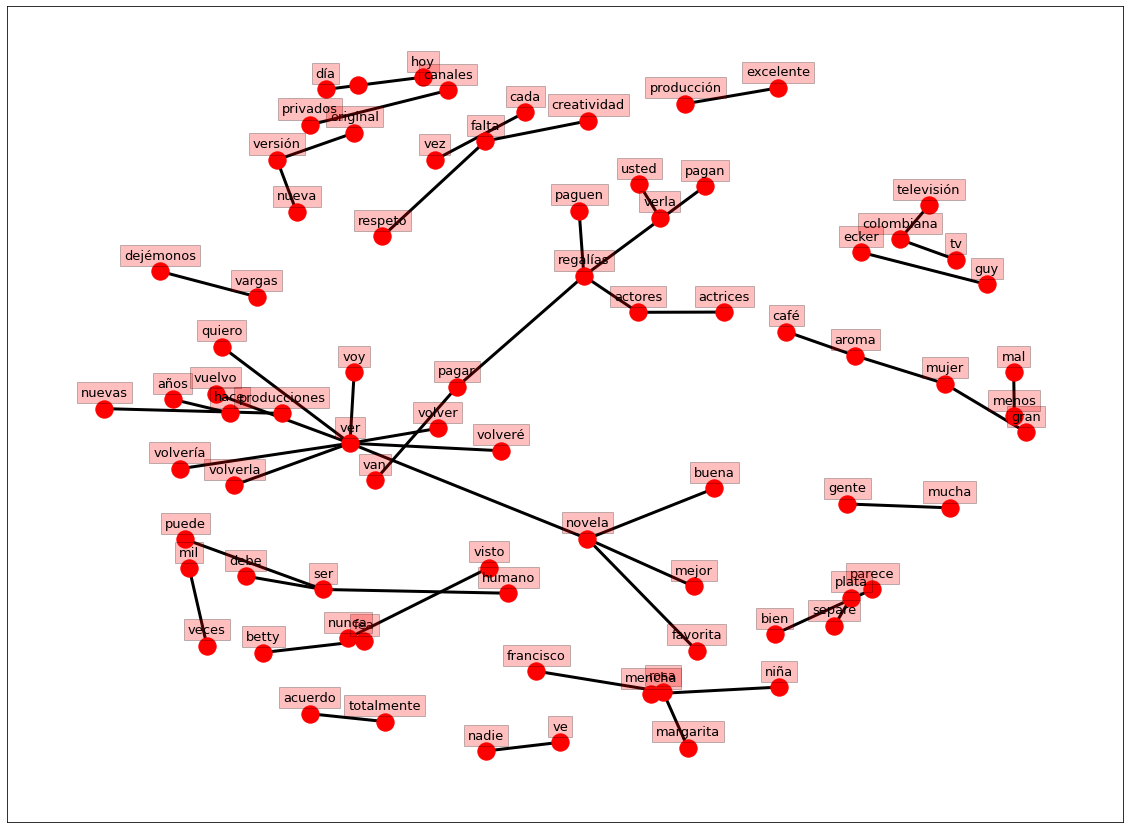

In [98]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

# Lematización (Lemmatization)
Es la acción de identificar en el texto, dada una forma flexionada, el lema correspondiente. 

Se entiende como forma flexionada de una palabra, el plural, femenino, o conjugación de un verbo.

El lema es la forma que representa todas las formas flexionadas de una misma palabra. 

Por ejemplo, el lema de una conjugación de un verbo es el verbo en infinitivo. De un sustantivo en plural, es el sustantivo en singular y masculino.

In [ ]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

In [ ]:
import es_core_news_sm
nlp = es_core_news_sm.load()

La descripción de las diferentes abreviaturas la puede encontrar en: https://spacy.io/api/annotation#pos-tagging

In [ ]:
print(df_clean.tweet[0])
d=nlp(df_clean.tweet[0])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

 nota rejunte info mal ensamblada cuántas bobadas publican pasar vergüenza msj william borró minutos telenovela éxito dsd estreno vio x dsd


[[' ', ' ', 'SPACE', ''],
 ['nota', 'noto', 'VERB', ''],
 ['rejunte', 'rejuntar', 'ADV', ''],
 ['info', 'info', 'ADJ', 'PER'],
 ['mal', 'mal', 'ADV', ''],
 ['ensamblada', 'ensamblar', 'ADJ', ''],
 ['cuántas', 'cuánto', 'NOUN', ''],
 ['bobadas', 'bobada', 'ADJ', ''],
 ['publican', 'publicar', 'VERB', ''],
 ['pasar', 'pasar', 'VERB', ''],
 ['vergüenza', 'vergüenza', 'NOUN', ''],
 ['msj', 'msj', 'PROPN', 'PER'],
 ['william', 'william', 'PROPN', 'PER'],
 ['borró', 'borrar', 'VERB', ''],
 ['minutos', 'minuto', 'NOUN', ''],
 ['telenovela', 'telenovela', 'VERB', ''],
 ['éxito', 'éxito', 'NOUN', ''],
 ['dsd', 'dsd', 'PROPN', 'MISC'],
 ['estreno', 'estrenar', 'ADJ', 'MISC'],
 ['vio', 'ver', 'VERB', ''],
 ['x', 'x', 'PROPN', ''],
 ['dsd', 'dsd', 'PROPN', '']]

Por ejemplo, detectar los sustantivos en un texto

In [ ]:
for noun in d.noun_chunks:
  print(noun.text)

cuántas
vergüenza
msj
william
minutos
éxito
dsd
x dsd


In [ ]:
[[tok.lemma_] for tok in d]

[[' '],
 ['noto'],
 ['rejuntar'],
 ['info'],
 ['mal'],
 ['ensamblar'],
 ['cuánto'],
 ['bobada'],
 ['publicar'],
 ['pasar'],
 ['vergüenza'],
 ['msj'],
 ['william'],
 ['borrar'],
 ['minuto'],
 ['telenovela'],
 ['éxito'],
 ['dsd'],
 ['estrenar'],
 ['ver'],
 ['x'],
 ['dsd']]

In [ ]:
df_clean['lemmas'] = df_clean.tweet.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [ ]:
df_clean[['tweet','lemmas']].head()

,tweet,lemmas
0,nota rejunte info mal ensamblada cuántas boba...,"[ , noto, rejuntar, info, mal, ensamblar, cuán..."
1,puto sano juicio envidia yina calderón,"[puto, sanar, juicio, envidiar, yina, calderón]"
2,falso montaje,"[falso, montaje]"
3,deben detener salvaje hp,"[deber, detener, salvaje, hp]"
4,isabella feliz arrogancia falta liderazgo malt...,"[isabella, feliz, arrogancia, falto, liderazgo..."


In [ ]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('ver', 578),
 ('hacer', 505),
 ('ir', 414),
 ('q', 287),
 ('bueno', 282),
 ('poder', 282),
 ('decir', 269),
 ('ser', 254),
 ('programar', 245),
 ('dar', 237),
 ('deber', 217),
 ('pasar', 202),
 ('tan', 199),
 ('bien', 196),
 ('querer', 187)]

Algo interesante de este módulo es si usamos la frase completa, es capaz de hacer el análisis completo de la oración y podemos visualizar el gráfico de dependencias.

La lista de depndencias pueden verla aquí: 
https://universaldependencies.org/u/dep/index.html

In [ ]:
ejemploOracion = nlp('El curso de analítica de datos de la Universidad EIA de la profesora Isis tiene un grupo de estudiantes muy brillantes')
spacy.displacy.render(ejemploOracion, style='dep', jupyter=True, options={'distance': 90})

Identificación de la entidades en el texto: 

En este ejemplo reconoce Persona: Isis y Organización: Universidad EIA

In [ ]:
[(e,  e.label_) for e in ejemploOracion.ents]

[(Universidad EIA, 'ORG'), (Isis, 'PER')]

# Radicalización (Stemming)
Stremming es el proceso de llevar las palabras a su forma raíz.

Después de dividido el texto en palabras, pasamos a hacer el stemming. Para hacerlo en idioma español debemos usar la librería SnowballStemmer, que permite varios lenguajes además del inglés.

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer ## Para poder hacerlo con idiomas diferentes al inglés

In [ ]:
stemmer_spanish = SnowballStemmer("spanish")

In [ ]:
df_clean['tokens_stem'] = df_clean['tokens'].apply(lambda text: [s for s in [stemmer_spanish.stem(i) for i in text] if s.isalpha() and len(s) > 1])

In [ ]:
df_clean[['tokens','tokens_stem']].head(2)

,tokens,tokens_stem
0,"[nota, rejunte, info, mal, ensamblada, cuántas...","[not, rejunt, info, mal, ensambl, cuant, bob, ..."
1,"[puto, sano, juicio, envidia, yina, calderón]","[put, san, juici, envidi, yin, calderon]"


In [ ]:
path='/content/drive/My Drive/Analitics_Esp/'
df_clean.to_csv(path+'RCNTV_Clean.csv', encoding='utf-8-sig')

In [ ]:
#df = pd.read_csv(path+'RCNTV_Clean.csv', encoding='utf-8-sig')

# Bag of Words

In [ ]:
import gensim
from gensim import corpora
import numpy as np

In [ ]:
words=[]
for w in df_clean.lemmas:
  words.append(w)

In [ ]:
words

[[' ',
  'noto',
  'rejuntar',
  'info',
  'mal',
  'ensamblar',
  'cuánto',
  'bobada',
  'publicar',
  'pasar',
  'vergüenza',
  'msj',
  'william',
  'borrar',
  'minuto',
  'telenovela',
  'éxito',
  'dsd',
  'estrenar',
  'ver',
  'x',
  'dsd'],
 ['puto', 'sanar', 'juicio', 'envidiar', 'yina', 'calderón'],
 ['falso', 'montaje'],
 ['deber', 'detener', 'salvaje', 'hp'],
 ['isabella',
  'feliz',
  'arrogancia',
  'falto',
  'liderazgo',
  'maltratar',
  'malo',
  'ejemplo',
  'luchar',
  'miedo',
  'acompañarlo',
  'show',
  'lágrima',
  'grupo',
  'deber',
  'asir',
  'salir',
  'bueno',
  'concursante',
  'insoportable',
  'egocéntrico',
  'falto',
  'palabra'],
 ['gracia', 'yasmin', 'abrazar', 'grande'],
 [' ', 'saludo'],
 ['gracia'],
 ['escuchar', 'pronto'],
 ['escuchar', 'pronto'],
 ['gracia'],
 ['parecer', 'canal', 'youtubers', 'mostrar', 'publiciones'],
 ['cacho', 'dedicar', 'semana'],
 ['bueno', 'verdad', 'ver', 'mejor', 'sorprender', 'quedar'],
 ['declaración',
  'd',
  'deb

In [ ]:
dic=corpora.Dictionary(words)

In [ ]:
bow_corpus = [dic.doc2bow(w) for w in words]

Crear un modelo para clasificar el texto

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.016*"ver" + 0.015*"hacer" + 0.013*"ir" + 0.012*"dar" + 0.010*"programar" + 0.009*"decir" + 0.008*"saber" + 0.008*"solo" + 0.008*"ser" + 0.007*"mejor"'),
 (1,
  '0.010*"q" + 0.010*"ir" + 0.010*"hora" + 0.010*"bueno" + 0.006*"asir" + 0.006*"bien" + 0.006*"programar" + 0.006*"hacer" + 0.006*"…" + 0.005*"medio"'),
 (2,
  '0.014*"hacer" + 0.010*"ver" + 0.009*"ir" + 0.009*"bueno" + 0.008*"poder" + 0.007*"deber" + 0.006*"decir" + 0.005*"colombia" + 0.005*"mismo" + 0.005*"querer"'),
 (3,
  '0.021*"ver" + 0.011*"q" + 0.009*"pm" + 0.007*"nuevo" + 0.007*"chef" + 0.007*"pasar" + 0.006*"gustar" + 0.006*"seguir" + 0.006*"tv" + 0.006*"esperar"')]

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.038724 -0.006288       1        1  33.199997
1      0.011080 -0.140392       2        1  24.686067
2      0.151059  0.070733       3        1  21.619335
3     -0.123415  0.075946       4        1  20.494601, topic_info=        Term        Freq       Total Category  logprob  loglift
743       pm  101.000000  101.000000  Default  30.0000  30.0000
123        q  236.000000  236.000000  Default  29.0000  29.0000
547    nuevo  102.000000  102.000000  Default  28.0000  28.0000
1393    chef   66.000000   66.000000  Default  27.0000  27.0000
1041    hora  152.000000  152.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
154   rating   35.017368  131.810107   Topic4  -5.4793   0.2595
119    hacer   45.167665  435.254539   Topic4  -5.2247  -0.6805
29     deber   36.579525  184.818062   Topic4  -5.4356  -0.0349
211      ser   33.976775  208.912014   Topic4  -5.5094  -0.2312
69     mejor   31.336907  147.659077   Topic4  -5.5903   0.0349

[297 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.272407         
0         4  0.703718         
1652      1  0.086846  abortar
1652      2  0.738189  abortar
1652      4  0.173692  abortar
...     ...       ...      ...
105       4  0.106896    votar
1518      3  0.961881        “
1519      3  0.980163        ”
793       1  0.288187        …
793       2  0.714203        …

[461 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])